In [63]:
# import the necessary packages
import cv2
import numpy as np
from PIL import Image

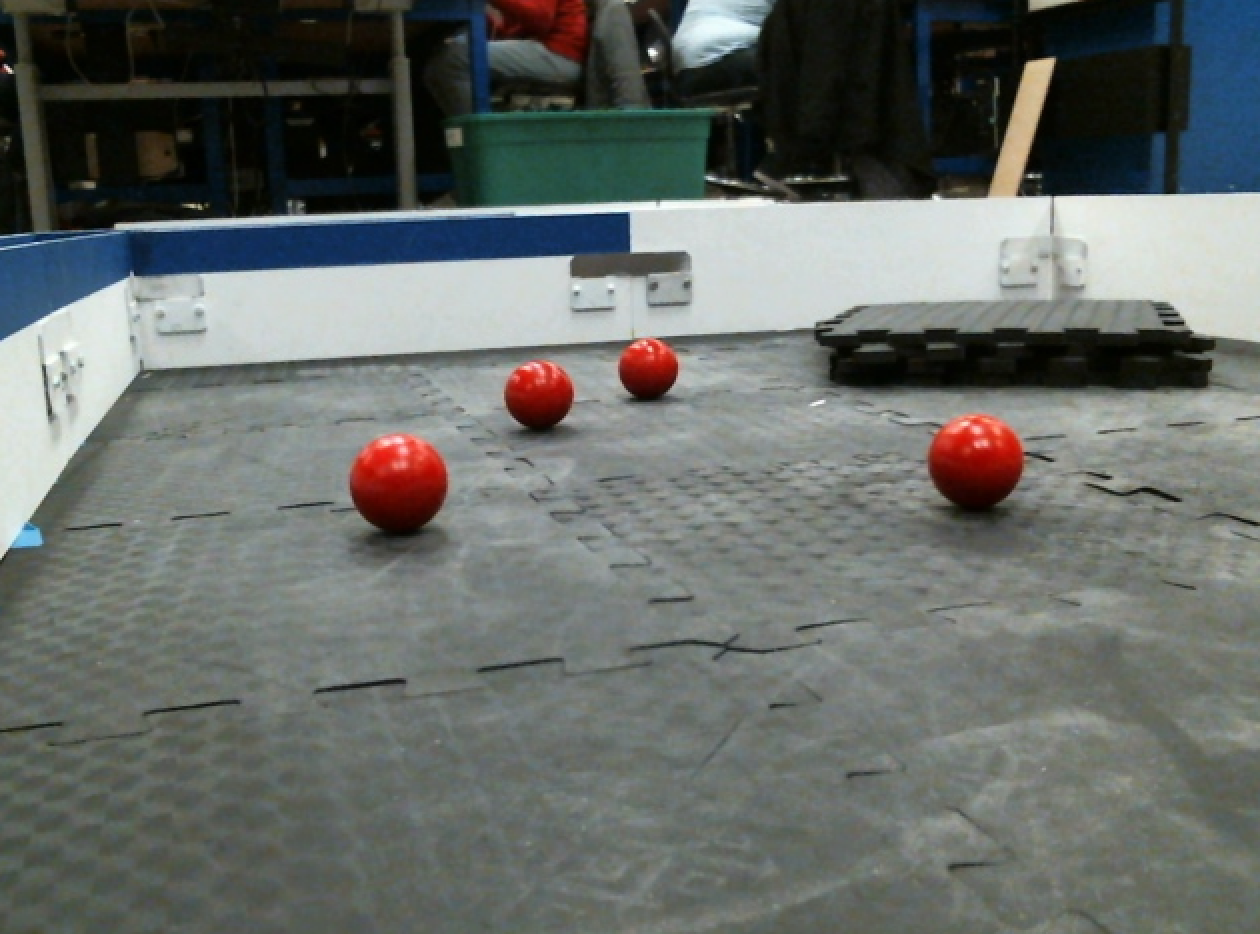

In [64]:
#raw_img = Image.open("/home/maslab/opencv/old_scripts/red_image.png")
raw_img = Image.open("/home/maslab/opencv/images/arena_balls_5.png")
Image.fromarray(np.array(raw_img))

In [65]:
# raw_img = np.array(raw_img)[175:,:450]
raw_img = np.array(raw_img)
img = raw_img.astype(np.float32).copy()
# rgb from PIL, bgr from opencv
# mask = (img[:,:,2] > 1.3*img[:,:,1]) & (img[:,:,2] > 1.3*img[:,:,0])
mask = (img[:,:,2] > 200) & (img[:,:,1] > 200) & (img[:,:,0] > 200)
new_im_arr = np.zeros(mask.shape)
# img[:,:,1] = 0
# img[:,:,0] = 0
# Image.fromarray(np.array(mask))

wall_filter_mask = np.zeros(mask.shape)
for j in range(mask.shape[1]):
    for i in range(mask.shape[0]):
        if not mask[i][j]:
            wall_filter_mask[i][j] = True
        else:
            break
        
print new_im_arr.shape
print mask.shape
print img.shape
print wall_filter_mask.shape
np.place(img[:,:,0], wall_filter_mask, 100)
# np.place(img[:,:,0], 1-wall_filter_mask, 0)
np.place(img[:,:,1], wall_filter_mask, 100)
# np.place(img[:,:,1], 1-wall_filter_mask, 0)
np.place(img[:,:,2], wall_filter_mask, 100)
# np.place(img[:,:,2], 1-wall_filter_mask, 0)

(934, 1260)
(934, 1260)
(934, 1260, 4)
(934, 1260)


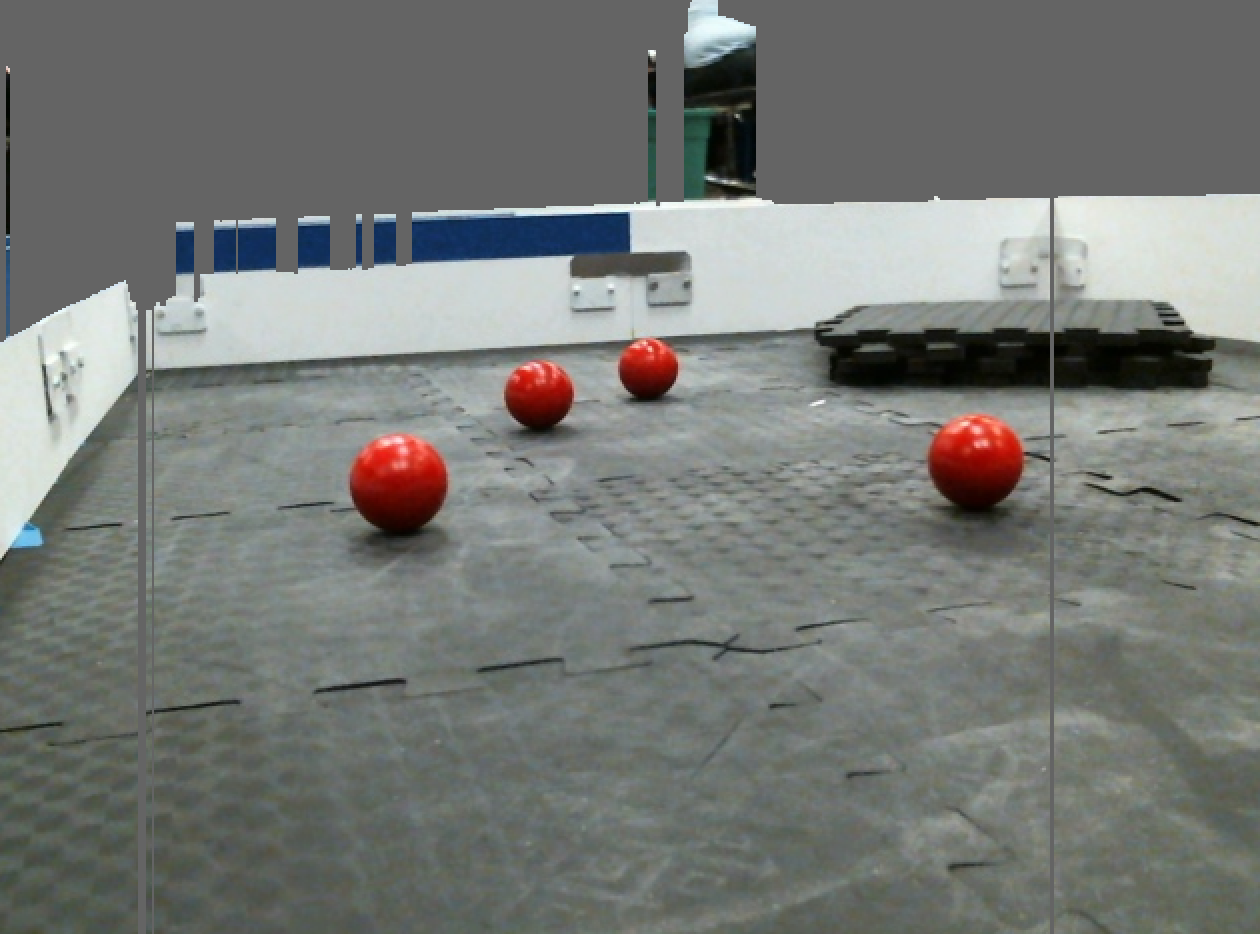

In [66]:
Image.fromarray(img.astype(np.uint8))

In [ ]:
# now, we will go back and do the blob detection on the filtered image.
# filtered_img = img.astype(np.float32).copy()
# hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# # define range of blue color in HSV
# lower_blue = np.array([110,50,50])
# upper_blue = np.array([130,255,255])

# # Threshold the HSV image to get only blue colors
# mask = cv2.inRange(hsv, lower_blue, upper_blue)

# RGB FILTERING
mask = (img[:,:,0] > 1.3*img[:,:,1]) & (img[:,:,0] > 1.3*img[:,:,2])
# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)
img[:,:,1] = 0
img[:,:,2] = 0
np.place(img[:,:,0], mask, 255)
np.place(img[:,:,0], 1-mask, 0)

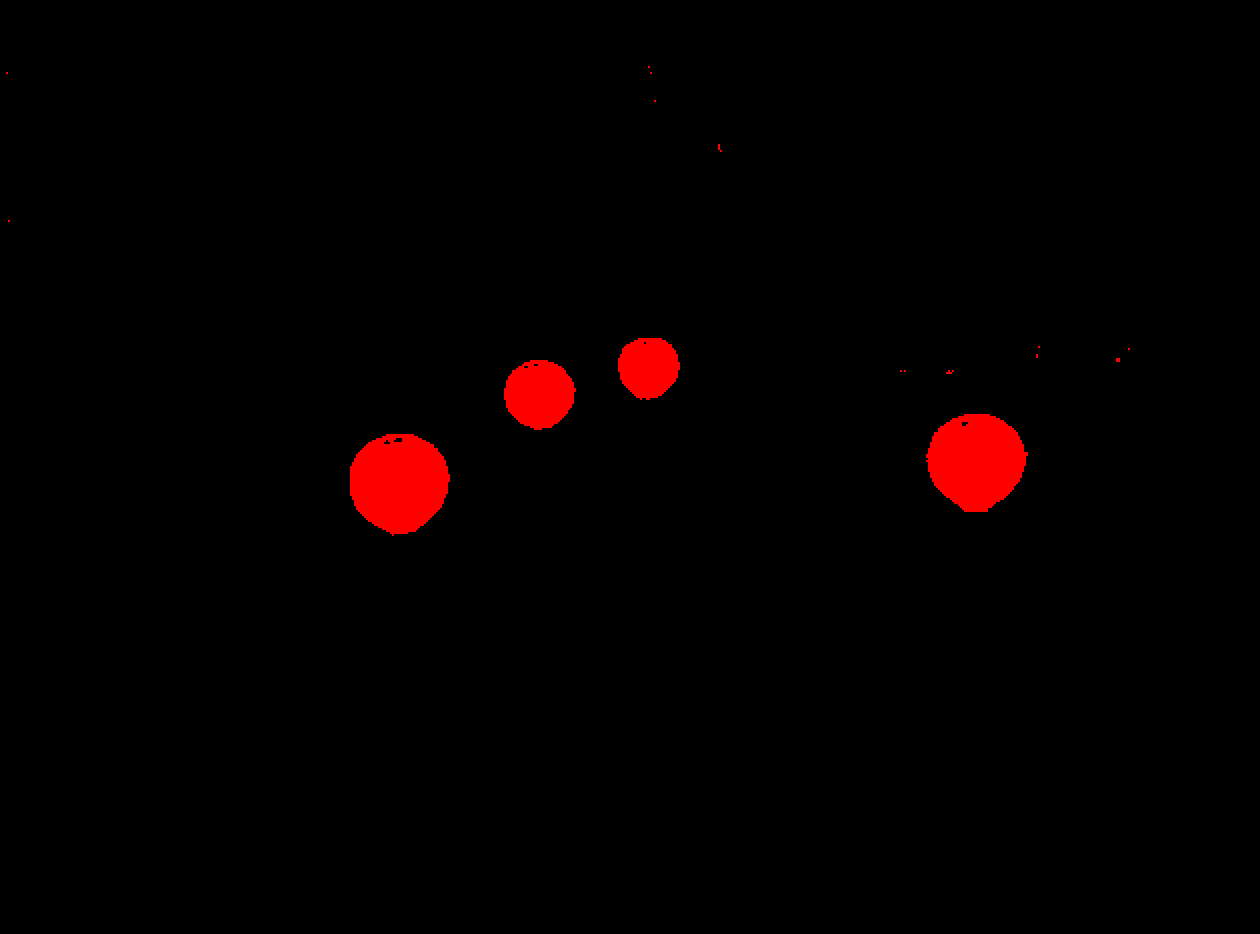

In [68]:
Image.fromarray(img.astype(np.uint8))

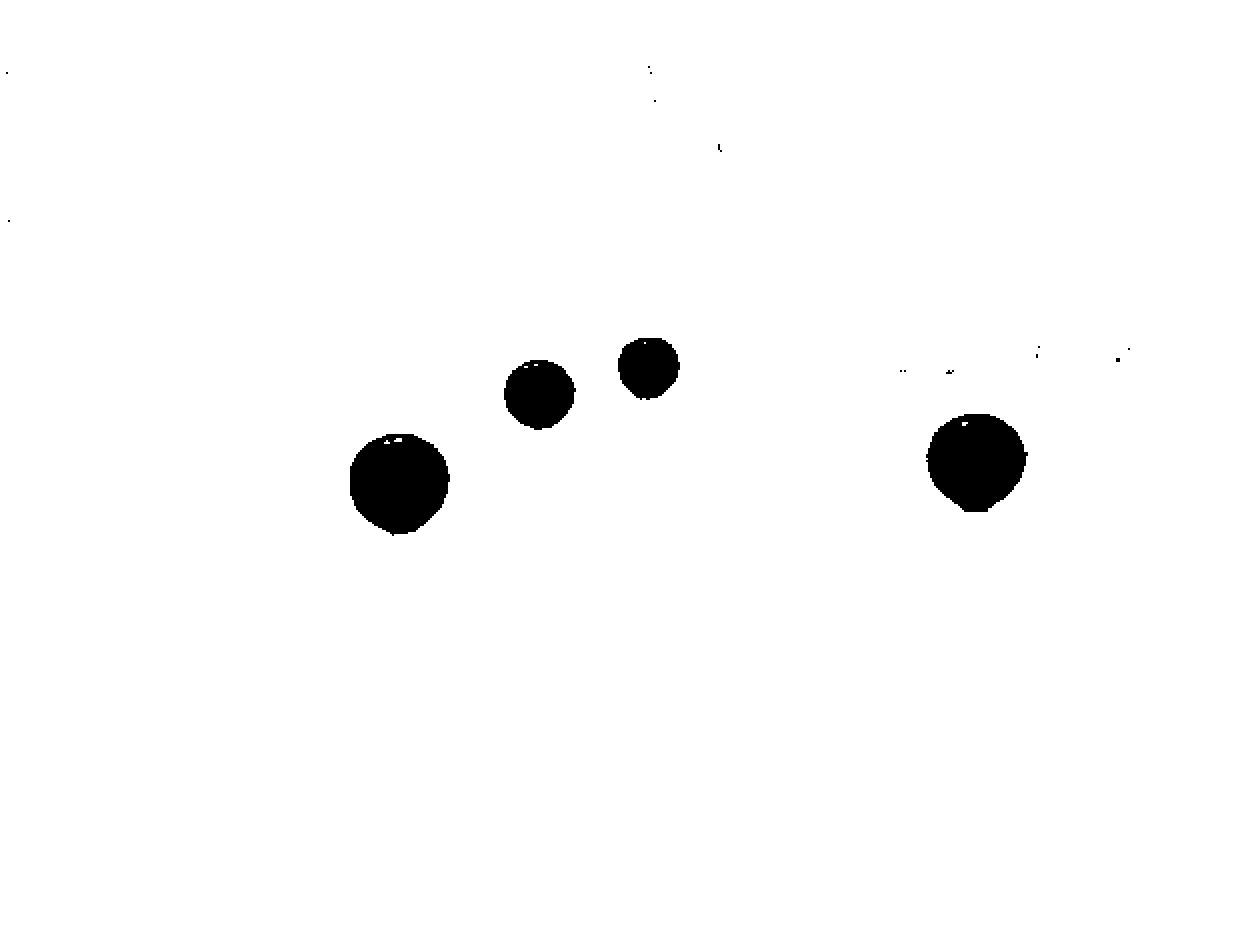

In [69]:
new_im =  ((1-mask)*255).astype(np.uint8)
Image.fromarray(new_im)

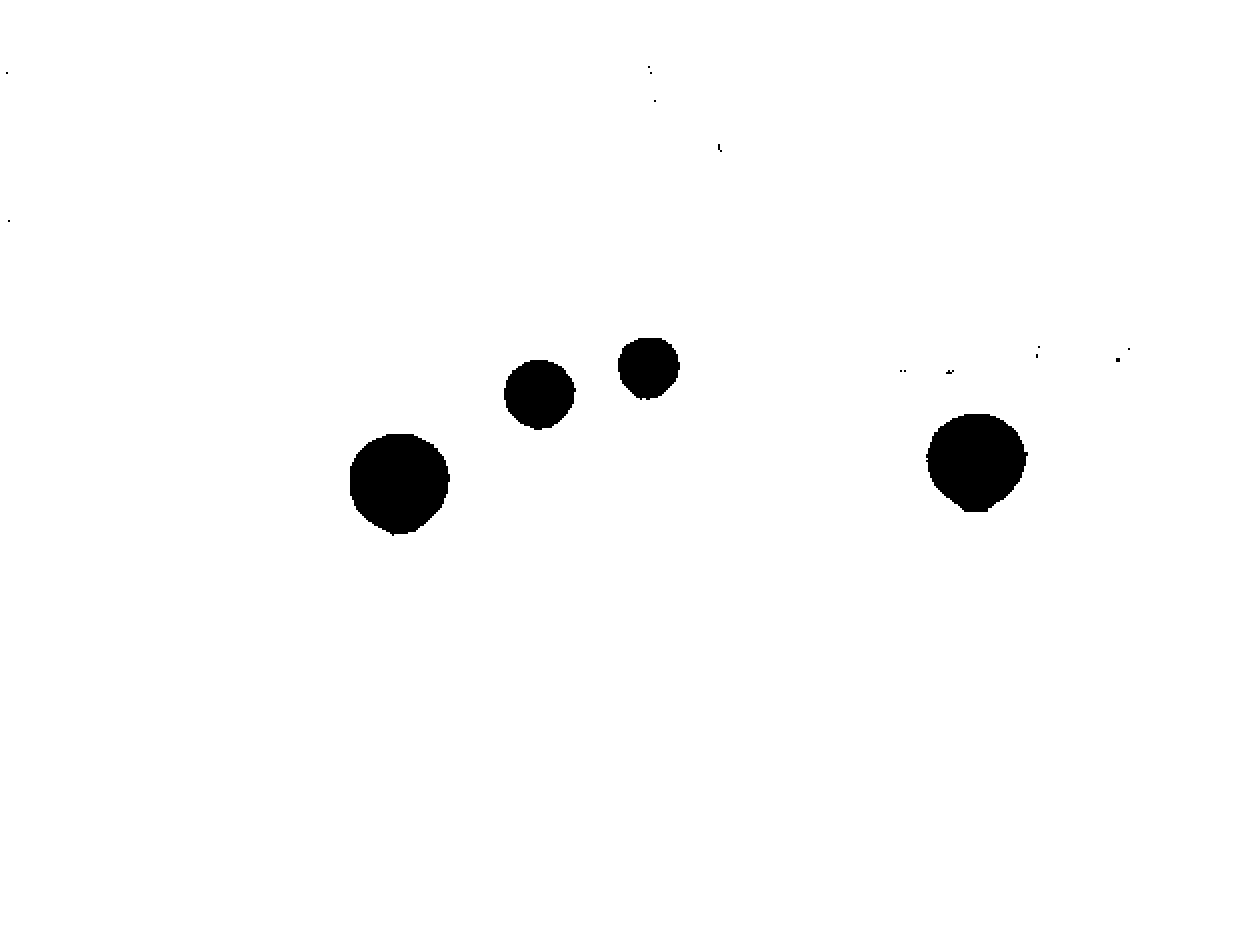

In [70]:
# flood fill algorithm for the balls
th, im_th = cv2.threshold(new_im, 220, 255, cv2.THRESH_BINARY_INV)
# im_th is white ball and black background
im_floodfill = im_th.copy()
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(im_floodfill, mask, (0,0), 255)
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = im_th | im_floodfill_inv
im_out = cv2.bitwise_not(im_out)
Image.fromarray(im_out)


In [71]:
#################################################################################################
# Set up the detector with custom parameters.
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
#params.minThreshold = 10
#params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 100
params.maxArea = 100000 # 100,000 seems to work well

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.65
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
# params.filterByInertia = True
# params.minInertiaRatio = 0.01
params.filterByColor = False
params.blobColor = 255
# Create a detector with the parameters
detector = cv2.SimpleBlobDetector(params)
#detector = cv2.SimpleBlobDetector()

number of detected blobs  4


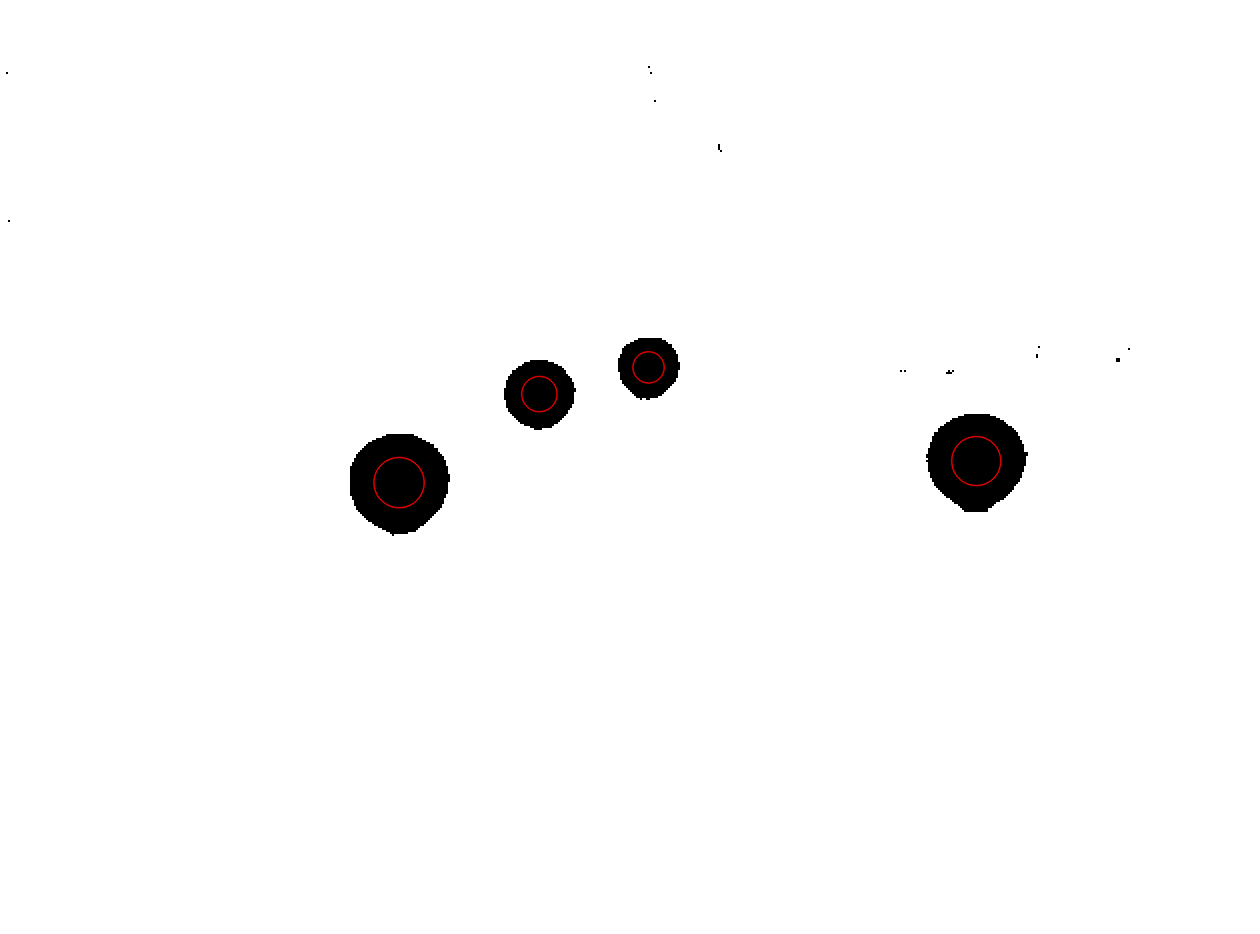

In [72]:
#################################################################################################
# Detect blobs.
keypoints = detector.detect(im_out)
print "number of detected blobs ", len(keypoints)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im_out, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
# cv2.imshow("Keypoints", im_with_keypoints)
Image.fromarray(im_with_keypoints)

In [74]:
print keypoints.

<KeyPoint 0x7f53ba33fc00>


In [75]:
a = keypoints[0]

In [76]:
a.pt

(398.53131103515625, 482.1065368652344)

In [77]:
a.size

50.21002197265625

In [78]:
|

SyntaxError: invalid syntax (<ipython-input-78-4b37ef281455>, line 1)